## EJERCICIO 1 – Números primos
En matemáticas, un número primo es un número natural mayor que 1 que tiene
únicamente dos divisores positivos distintos: él mismo y el 1. En este ejercicio se pide
calcular los 100 primeros números primos (ojo! No los números primos del 1 al 100)  
utilizando 3 métodos distintos:
* Fuerza bruta
* Método recursivo
* Un método mejor que los dos anteriores.

Se pide al alumno programar los tres algoritmos, medir los tiempos de respuesta, y
calcular la complejidad en cada uno de los tres casos…¿Existe una diferencia tangible
entre los tres?  
*no se permite utilizar break() dentro del código.

## Super Bruto....
Simplemente ver si es divisible por 2, o por todos los impares hasta la raíz del numero....

In [2]:
import math

def isPrime_dumb(n):
    if n % 2 == 0:
        return False
    if  0 in [ (n % i) for i in range(3,int(math.sqrt(n))+1,2)]:
        return False
    return True

print ([i for  i in range(100) if isPrime_dumb(i)])

[1, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


Ahora busquemos los primernos 5000, entre los impares

In [51]:
%%timeit
target = 5000
primes = [2,3]
theNumber = 5
while len(primes) < target:

    if isPrime_dumb(theNumber): primes.append(theNumber)
    theNumber += 2

# print (target,primes[-5:])


119 ms ± 1.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### fuerza bruta
ir por todos los números, y ver si no tiene divisores entre los primos inferiores   

In [20]:
%%timeit
target = 5000
primes = [2,3]
theNumber = 5
while len(primes) < target:

    # print (f"testing # {theNumber}")
    rems = [ (theNumber % prime)  for prime in primes]
    
    if  0 not in rems:
        primes.append(theNumber)
       # print(f"Adding # {theNumber} to get {primes}")

    theNumber += 2

# print (target,primes[-1])


3.55 s ± 60.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Fuerza bruta algo optimizada
evita calcular todas las divisiones

In [4]:
%%timeit
target = 5000
primes = [2,3]
theNumber = 5
while len(primes) < target:

    i = 0
    while i < len(primes):
        if theNumber % primes[i] == 0:
            i = len(primes)+1
        else:
            i  += 1
            
    if i == len(primes):
        primes.append(theNumber)
       
        
    theNumber += 2
    
print (target,primes[-1])

5000 48611
5000 48611
5000 48611
5000 48611
5000 48611
5000 48611
5000 48611
5000 48611
2.16 s ± 31.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Modelo recursivo...

In [6]:
 
# Returns true if n is prime, else
# return false.
# i is current divisor to check.
def isPrime(n, i = 2):
    ##Base cases
    if ( n % 2  == 0 ) or (n % i == 0):
        return False

    if (i * i > n):
        return True
 
    # Check for next divisor
    return isPrime(n, i + 1);

In [38]:

print ([i for  i in range(100) if isPrime(i)])

[1, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [24]:
%%timeit
target = 5000
primes = [2,3]
n = 1 
while len(primes) < target:
    suspect = 6*n-1
    if isPrime(suspect): primes.append(suspect)
    if isPrime(suspect+2): primes.append(suspect+2)
    n += 1
# print(primes[:10],primes[-10:])

270 ms ± 21.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


De hecho, estoy haciendo mucho más de lo necesario...  
no voy a chequear los pares, por tanto no voy a dividir por dos...

In [20]:
# Returns true if n is prime, else
# return false.
# i is current divisor to check.
def isSmartPrime(n, i = 3):
    ##Base cases
    if (n % i == 0):
        return False

    if (i * i > n):
        return True
 
    # Check for next divisor
    return isSmartPrime(n, i + 2);

In [22]:
%%timeit
target = 5000
primes = [2,3]
n = 1 
while len(primes) < target:
    suspect = 6*n-1
    if isSmartPrime(suspect): primes.append(suspect)
    if isSmartPrime(suspect+2): primes.append(suspect+2)
    n += 1

96.8 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Combinando la primera y la última...

In [57]:
%%timeit
target = 5000
primes = [2,3]
n1 = 5
n2 = 7 
while len(primes) < target:
    if isPrime_dumb(n1): primes.append(n1)
    if isPrime_dumb(n2): primes.append(n2)
    n1 += 6
    n2 += 6

79.9 ms ± 940 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


supongamos que no los quiero guardar... sólo el primo número 5000

In [60]:

%%timeit
target = 5000
count  = 2
n1 = 5
n2 = 7 
while count < target:
    count  += isPrime_dumb(n1)
    count  += isPrime_dumb(n2)
    n1 += 6
    n2 += 6
    

80.5 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


no parece que mejore mucho....

In [114]:
%%timeit

# these are infinite counters... 
n1 = itertools.count(5,6)
n2 = itertools.count(7,6)
target = 500
count  = 2
for i,j in zip(n1,n2):
    count  += isPrime_dumb(i)
    count  += isPrime_dumb(j)
    if count >= target: break

    

2.22 ms ± 25.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


tengo que ver como escala con cada complejidad algoritmica....  

and do the fitting


In [117]:

%time isPrime_dumb(511)

CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 14.5 µs


False

In [123]:
start = int(1E7)
interval = 1000

for n in range(start,start+interval):
    if isPrime_dumb(n):
        print (n)
        break

10000019


In [4]:
import time
n_vec = []
t_vec = []
for index in range(1,15):
    start = int(10**index)
    interval = 1000
    for n in range(start,start+interval):
        if isPrime_dumb(n):
            break
    n_vec.append(n)
    t0 = time.process_time_ns()
    for _ in range(10): 
        isPrime_dumb(n)
    t1 = (time.process_time_ns() - t0)/1000.0
    t_vec.append(t1)
    print (f"{index} test = {n}, time = {t1:.3F} us")

1 test = 11, time = 15.844 us
2 test = 101, time = 28.360 us
3 test = 1009, time = 33.960 us
4 test = 10007, time = 67.277 us
5 test = 100003, time = 176.767 us
6 test = 1000003, time = 561.230 us
7 test = 10000019, time = 2026.457 us
8 test = 100000007, time = 5682.484 us
9 test = 1000000007, time = 15160.278 us
10 test = 10000000019, time = 64406.100 us
11 test = 100000000003, time = 222805.342 us
12 test = 1000000000039, time = 774246.736 us
13 test = 10000000000037, time = 2474662.997 us
14 test = 100000000000031, time = 6917528.020 us


[ 0.49975899 -0.4031372 ]


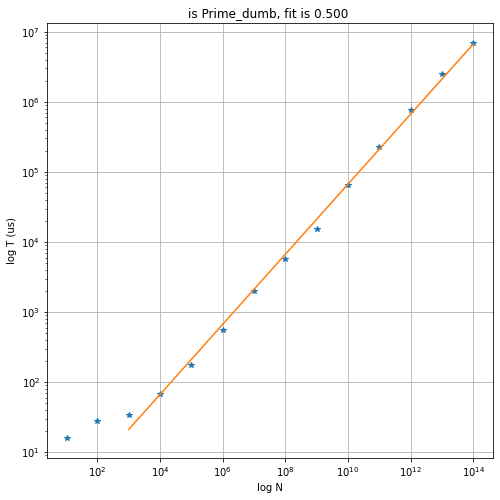

In [19]:
import matplotlib.pyplot as plt
import numpy as np 
fig, axes = plt.subplots(1,1,figsize=(8,8))
axes.plot(n_vec, t_vec,'*')

logn = [ math.log(n) for n in n_vec[2:]]
logt = [ math.log(t) for t in t_vec[2:]]
fit = np.polyfit(logn,logt,1)
print (fit)
fit_log = np.poly1d(fit)
t_fit = [ math.exp(fit_log(val)) for val in logn]
axes.plot(n_vec[2:],t_fit,label=str(fit[0]))
axes.set(xlabel='log N', ylabel='log T (us)',  title=f'is Prime_dumb, fit is {fit[0]:.3f} ')
axes.set_yscale('log')
axes.set_xscale('log')
axes.grid()
plt.show()

In [ ]:
import numpy as np 
